In [1]:
import pandas as pd
import numpy as np

# Define original and additional countries
original_countries = ['USA', 'China', 'Germany', 'Japan', 'South Korea', 'UK', 'France', 'Brazil', 'Italy', 'Canada']
additional_countries = ['Australia', 'Netherlands', 'Mexico', 'Turkey', 'Sweden', 'Switzerland', 'Spain', 'India', 'Belgium', 'Poland',
                        'Austria', 'Norway', 'Denmark', 'Finland', 'Ireland', 'Saudi Arabia', 'South Africa', 'Argentina', 'Singapore', 'Thailand',
                        'Malaysia', 'Philippines', 'Vietnam', 'Egypt', 'Israel', 'UAE', 'Chile', 'Colombia', 'Peru', 'New Zealand', 'Greece', 'Portugal',
                        'Czech Republic', 'Hungary', 'Ukraine', 'Romania', 'Slovakia', 'Croatia', 'Serbia', 'Bulgaria', 'Lithuania', 'Latvia', 'Estonia', 'Iceland']

# Combine and ensure uniqueness
all_countries = list(set(original_countries + additional_countries))

# Generate synthetic trade data
np.random.seed(42)
years = np.arange(2015, 2024)
relations = ['Import', 'Export']
goods_types = ['Electronics', 'Machinery', 'Chemicals', 'Textiles', 'Food', 'Oil', 'Metals']

data = []
for year in years:
    for country in all_countries:
        for _ in range(np.random.randint(1, 4)):  # Random number of records per country
            relation = np.random.choice(relations)
            goods_type = np.random.choice(goods_types)
            trade_value = np.round(np.random.uniform(0.1, 10.0), 2)  # Trade value in billion USD
            data.append([year, country, relation, goods_type, trade_value])

# Create DataFrame
df = pd.DataFrame(data, columns=['Year', 'Country', 'Relation', 'Goods Type', 'Trade Value (in billion USD)'])

# Save to CSV
df.to_csv('synthetic_trade_data_expanded.csv', index=False)


In [3]:
df.head()

Year   Country Relation Goods Type  Trade Value (in billion USD)
0  2015    Brazil   Export       Food                          1.92
1  2015    Brazil   Export       Food                          6.01
2  2015    Brazil   Export  Chemicals                          1.09
3  2015  Malaysia   Export       Food                          6.05
4  2015  Malaysia   Export  Chemicals                          0.30

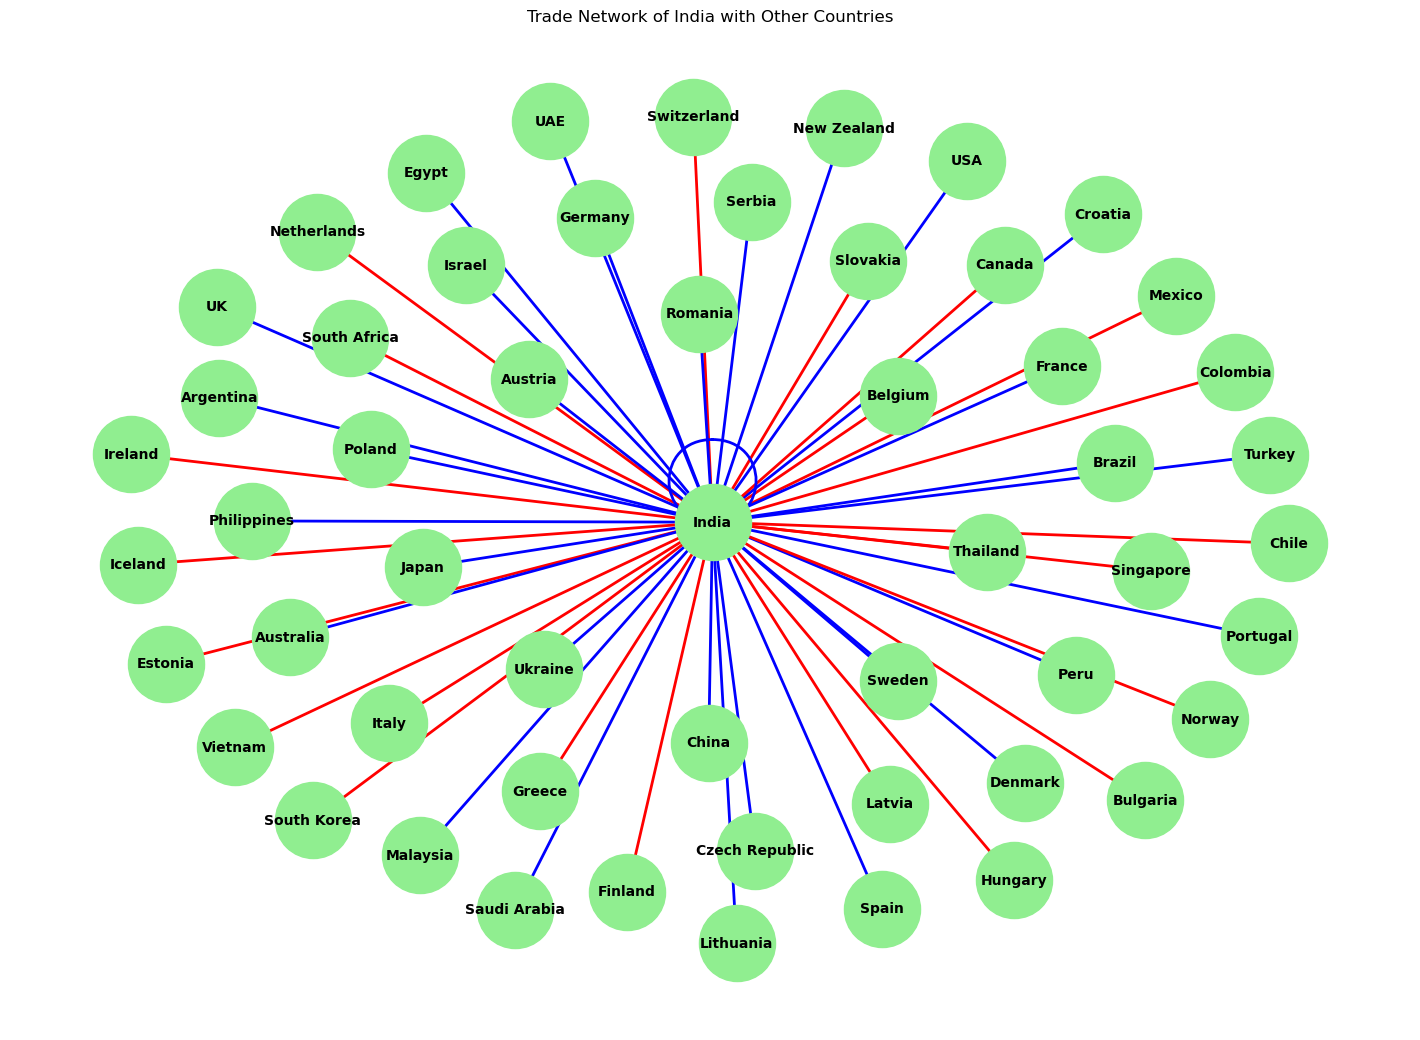

In [5]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the expanded synthetic data
df = pd.read_csv('synthetic_trade_data_expanded.csv')

# Initialize the graph
G = nx.Graph()

# Add India as the central node
central_node = 'India'
G.add_node(central_node)

# Add edges for each relationship
for index, row in df.iterrows():
    country = row['Country']
    relation = row['Relation']
    
    # Add nodes for each country and an edge from India to the country
    G.add_node(country)
    if not G.has_edge(central_node, country):
        G.add_edge(central_node, country, color='blue' if relation == 'Export' else 'red')

# Extract edge colors
colors = [G[u][v]['color'] for u, v in G.edges()]

# Draw the network
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, seed=42)  # Position nodes using spring layout
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightgreen', edge_color=colors, width=2, font_size=10, font_weight='bold')
plt.title('Trade Network of India with Other Countries')
plt.show()


Label Distribution: Counter({1: 76, 0: 74})
Sample Features and Labels:
Feature: [ 0.48953205 -1.6543964  -0.3502143   0.27393332  0.9340835  -0.8425489
 -0.1421189   0.22276463  0.78838533 -0.4710144 ], Label: 1
Feature: [ 0.12373157  0.8823089  -0.47109705 -1.3835536   1.3463173  -0.62488216
 -1.3839927   0.42943192  0.23805086  0.54535574], Label: 1
Feature: [ 0.10863019  0.22321077 -1.1231648   1.5334058  -1.4571879  -0.08520152
  0.163895    0.7453416  -0.43550244 -1.303626  ], Label: 0
Feature: [ 0.71294373 -0.07885063  0.06958029 -1.522045   -0.5256304  -0.1722898
  0.95847833  0.60516065 -0.87562084 -1.9555298 ], Label: 0
Feature: [ 1.6486853   0.33981657  0.48542735 -0.11717875 -0.19673878  0.6965851
 -0.47334284 -1.2725317  -0.5463041   0.7785688 ], Label: 1
Epoch 0, Loss: 0.5347
Epoch 1, Loss: 0.5316
Epoch 2, Loss: 0.5285
Epoch 3, Loss: 0.5255
Epoch 4, Loss: 0.5226
Epoch 5, Loss: 0.5198
Epoch 6, Loss: 0.5171
Epoch 7, Loss: 0.5144
Epoch 8, Loss: 0.5118
Epoch 9, Loss: 0.5093
E

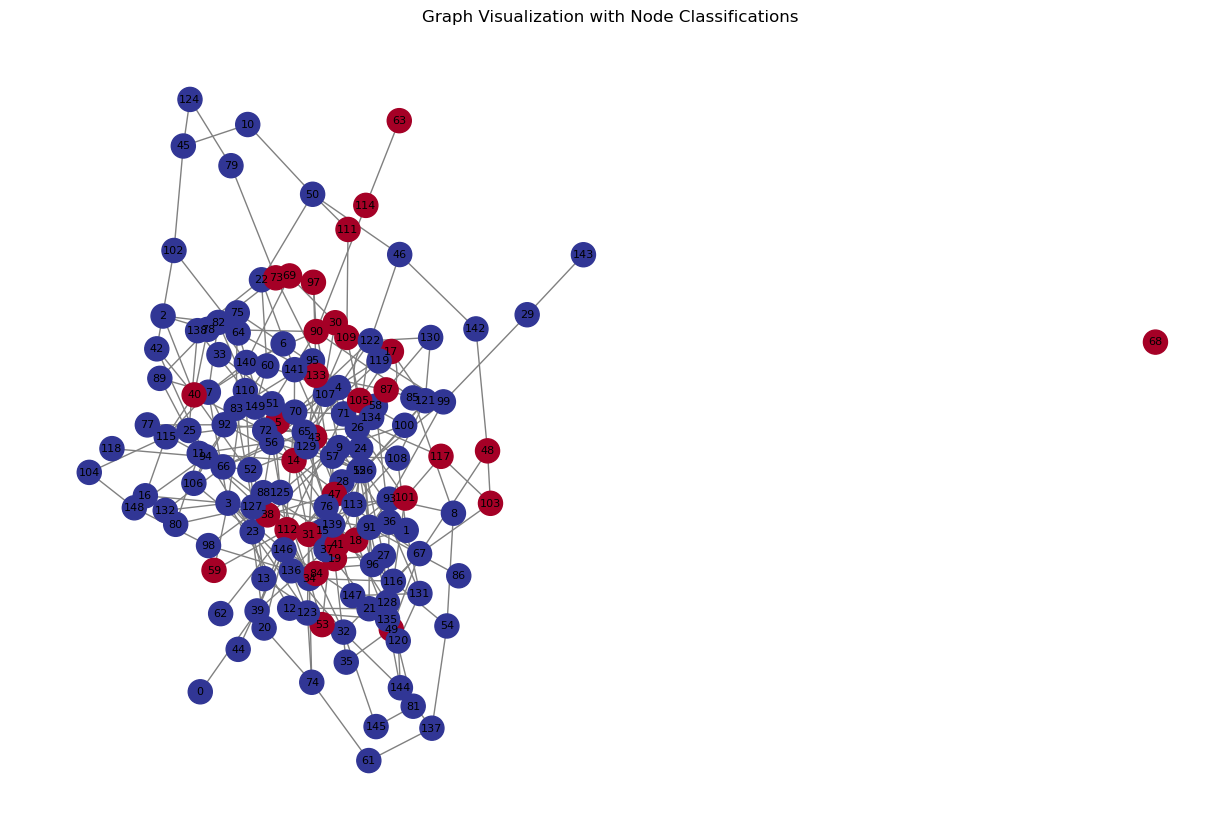

In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data
from torch.nn import CrossEntropyLoss
from collections import Counter
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Define the model
class GCN(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index).relu()
        x = self.conv2(x, edge_index)
        return x

# Sample data
num_nodes = 150  # Replace with the actual number of nodes
num_features = 10  # Replace with the actual number of features
num_classes = 2  # Replace with the actual number of classes

# Create a dummy dataset
features = torch.randn(num_nodes, num_features)
edge_index = torch.randint(0, num_nodes, (2, num_nodes * 2))
labels = torch.randint(0, num_classes, (num_nodes,))

data = Data(x=features, edge_index=edge_index, y=labels)

# Define masks
train_mask = torch.zeros(num_nodes, dtype=torch.bool)
train_mask[:80] = 1  # Use first 80 nodes for training
test_mask = torch.zeros(num_nodes, dtype=torch.bool)
test_mask[80:] = 1  # Use last 20 nodes for testing

# Ensure test_mask has elements
if test_mask.sum().item() == 0:
    raise ValueError("Test mask has no elements. Ensure it is set up correctly.")

# Initialize model, optimizer, and loss function
model = GCN(in_channels=num_features, hidden_channels=16, out_channels=num_classes)
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Define class weights based on data imbalance
class_weights = torch.tensor([1.0, 5.0])  # Adjust weights based on your classes
criterion = CrossEntropyLoss(weight=class_weights)

# Check label distribution
labels = data.y
print("Label Distribution:", Counter(labels.numpy()))

# Sample features and labels
print("Sample Features and Labels:")
for i in range(5):
    print(f"Feature: {data.x[i].numpy()}, Label: {labels[i].item()}")

# Training function
def train():
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = criterion(out[train_mask], labels[train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()

# Training loop
for epoch in range(500):
    loss = train()
    print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Evaluation function
def evaluate():
    model.eval()
    with torch.no_grad():
        out = model(data.x, data.edge_index)
        preds = out.argmax(dim=1)
        correct = (preds[test_mask] == labels[test_mask]).sum().item()
        
        # Ensure no division by zero
        test_mask_sum = test_mask.sum().item()
        if test_mask_sum == 0:
            raise ValueError("Test mask has no elements. Cannot compute accuracy.")
        
        accuracy = correct / test_mask_sum
        print(f'Accuracy: {accuracy:.4f}')

        # Visualization
        visualize_graph(preds)

def visualize_graph(predictions):
    G = nx.Graph()
    G.add_nodes_from(range(num_nodes))
    edge_index_np = data.edge_index.numpy()
    edges = list(zip(edge_index_np[0], edge_index_np[1]))
    G.add_edges_from(edges)

    pos = nx.spring_layout(G)
    labels = {i: str(i) for i in range(num_nodes)}

    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, labels=labels, node_color=predictions.numpy(), cmap=plt.cm.RdYlBu, node_size=300, edge_color='gray', font_size=8, font_color='black')
    plt.title('Graph Visualization with Node Classifications')
    plt.show()

evaluate()


In [18]:
!pip install torch
!pip install torch-geometric



In [80]:
import pandas as pd

# Load data to check label distribution
df = pd.read_csv('synthetic_trade_data_expanded.csv')
print(df['Relation'].value_counts())



Relation
Import    469
Export    468
Name: count, dtype: int64
